In [1]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Caminho do arquivo Excel
caminho_arquivo = '/content/drive/MyDrive/Prisma_Fiscal/base_prisma_var_macro.xlsx'

Mounted at /content/drive


In [22]:
df

,cambio,ibcbr,desemprego,ipca,ipca_exp_1,ipca_exp_3,ipca_exp_6,ipca_exp_12,ET_1mo,ET_2mo,ET_3mo,ET_1y,ET_5y,ET_10y,Arrecadacao_LDif_t0,Arrecadacao_LDif_t0+1,Arrecadacao_LDif_t0+2,Despesas_LDif_t0,Despesas_LDif_t0+1,Despesas_LDif_t0+2
data,,,,,,,,,,,,,,,,,,,,
2015-12-01,3.9048,95.64484,9.1,0.96,0.8000,0.6500,0.3000,0.66,14.233658,14.440692,14.632718,15.826079,16.570773,16.549070,0.096875,0.099222,-0.042051,0.104629,0.120759,0.049866
2016-01-01,4.0428,95.22231,9.6,1.27,0.6000,0.5000,0.3400,0.61,14.339920,14.240537,14.181820,14.468852,15.886586,16.306127,0.102373,-0.023505,0.006375,0.119453,0.054850,0.004273
2016-02-01,3.9796,95.20870,10.3,0.90,0.6600,0.3500,0.4700,0.52,14.502533,14.362424,14.253862,14.114350,15.621363,16.305634,-0.045261,-0.000009,0.025204,0.066836,0.006896,0.020575
2016-03-01,3.5589,94.43956,11.1,0.43,0.5000,0.3000,0.5200,0.55,14.261921,14.153967,14.062076,13.687533,13.899736,14.024831,0.017185,0.054523,-0.016295,-0.019529,0.014997,-0.014338
2016-04-01,3.4508,94.38295,11.3,0.61,0.3400,0.3100,0.5600,0.42,14.552601,14.376088,14.212486,13.190173,12.336009,12.466031,0.061748,0.003791,0.004573,-0.002499,-0.014436,0.040097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-01,5.8301,108.31633,6.5,0.16,0.4700,0.3450,0.2200,0.60,12.882583,13.290387,13.630533,14.919253,14.797740,14.702170,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-01,5.8488,108.78950,6.8,1.31,0.5000,0.3137,0.3311,0.37,13.480648,13.822489,14.097991,15.005505,15.275855,15.294560,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-01,5.7422,NaN,7.0,0.56,0.3700,0.3432,0.4000,0.40,13.860799,14.158372,14.400197,15.181835,15.073185,15.128527,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Carregar o dataframe
df = pd.read_excel(caminho_arquivo)

# Converter a coluna de data para datetime (substitua 'data' pelo nome real da coluna)
df['data'] = pd.to_datetime(df['data'])
df.set_index('data', inplace=True)

# Selecionar as colunas desejadas
colunas_interesse = ['cambio', 'ibcbr', 'desemprego', 'ipca',
                     'ET_1mo', 'ET_1y', 'ET_5y', 'ipca_exp_1', 'ipca_exp_3',
                     'Arrecadacao_LDif_t0', 'Despesas_LDif_t0']
df_series = df[colunas_interesse]

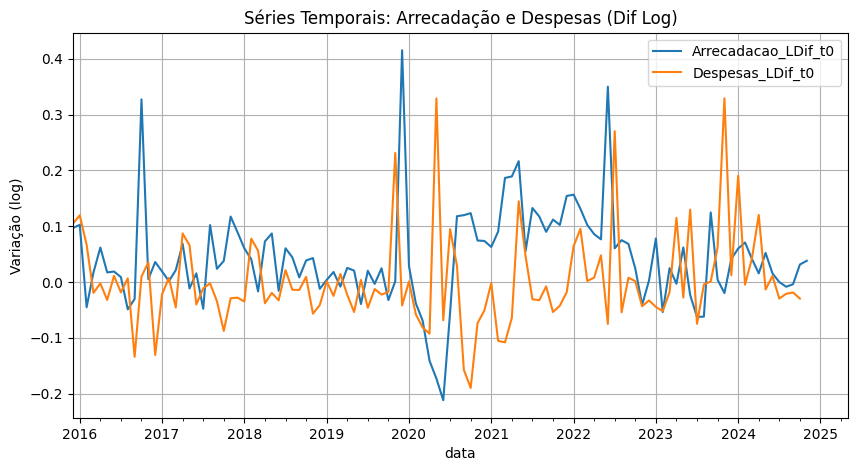

In [25]:
# Plotar as séries Arrecadacao_LDif_t0 e Despesas_LDif_t0
df_series[['Arrecadacao_LDif_t0', 'Despesas_LDif_t0']].plot(figsize=(10, 5))
plt.title('Séries Temporais: Arrecadação e Despesas (Dif Log)')
plt.ylabel('Variação (log)')
plt.grid(True)
plt.show()

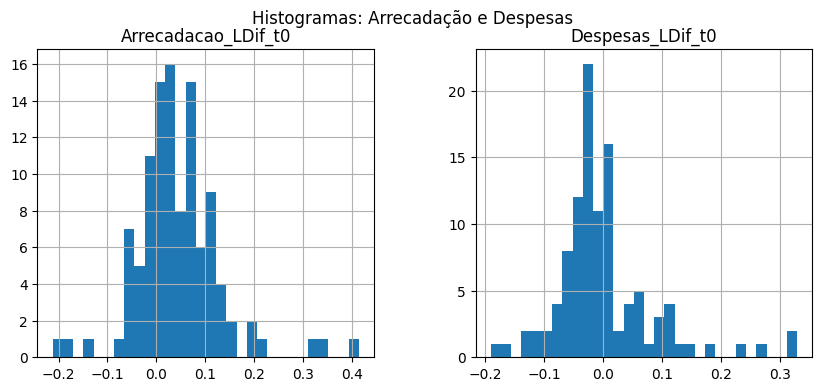

In [26]:
# Plotar histogramas
df_series[['Arrecadacao_LDif_t0', 'Despesas_LDif_t0']].hist(bins=30, figsize=(10, 4), layout=(1, 2))
plt.suptitle('Histogramas: Arrecadação e Despesas')
plt.show()

In [6]:
# Cálculo da média e desvio padrão
estatisticas = df_series[['Arrecadacao_LDif_t0', 'Despesas_LDif_t0']].agg(['mean', 'std'])
print("Estatísticas descritivas:")
print(estatisticas)

Estatísticas descritivas:
      Arrecadacao_LDif_t0  Despesas_LDif_t0
mean             0.043787          0.001524
std              0.087384          0.084306


In [146]:
# Criar colunas booleanas indicando quando o valor está acima de 2 desvios padrão
for col in ['Arrecadacao_LDif_t0', 'Despesas_LDif_t0']:
    media = estatisticas.loc['mean', col]
    desvio = estatisticas.loc['std', col]
    df_series[f'{col}_acima_dp'] = df_series[col] > (media + 2 * desvio)

<ipython-input-146-b50d0b174e6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_series[f'{col}_acima_dp'] = df_series[col] > (media + 2 * desvio)
<ipython-input-146-b50d0b174e6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_series[f'{col}_acima_dp'] = df_series[col] > (media + 2 * desvio)


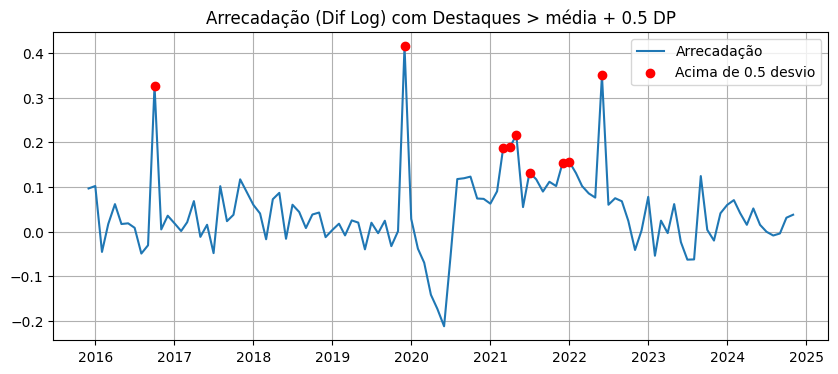

In [8]:
# Plotando série da Arrecadação com destaques
plt.figure(figsize=(10, 4))
plt.plot(df_series.index, df_series['Arrecadacao_LDif_t0'], label='Arrecadação')
plt.scatter(
    df_series.index[df_series['Arrecadacao_LDif_t0_acima_dp']],
    df_series['Arrecadacao_LDif_t0'][df_series['Arrecadacao_LDif_t0_acima_dp']],
    color='red', label='Acima de 0.5 desvio', zorder=5
)
plt.title('Arrecadação (Dif Log) com Destaques > média + 0.5 DP')
plt.legend()
plt.grid(True)
plt.show()

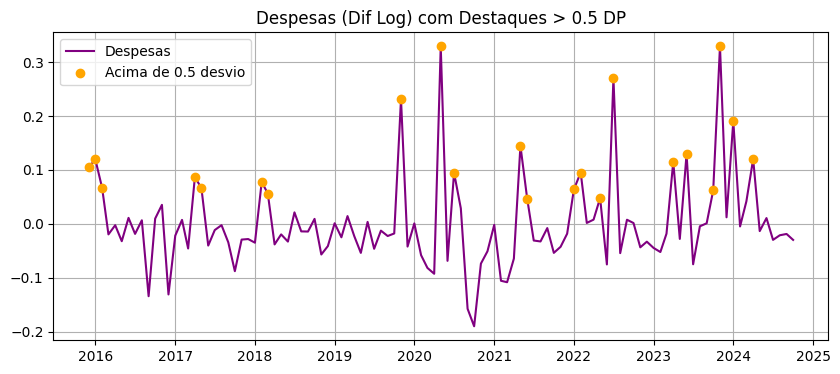

In [ ]:
# Plotando série das Despesas com destaques
plt.figure(figsize=(10, 4))
plt.plot(df_series.index, df_series['Despesas_LDif_t0'], label='Despesas', color="purple")
plt.scatter(
    df_series.index[df_series['Despesas_LDif_t0_acima_dp']],
    df_series['Despesas_LDif_t0'][df_series['Despesas_LDif_t0_acima_dp']],
    color='orange', label='Acima de 0.5 desvio', zorder=5
)
plt.title('Despesas (Dif Log) com Destaques > 0.5 DP')
plt.legend()
plt.grid(True)
plt.show()

In [147]:
# Limite inferior e superior
inicio = pd.Timestamp('2016-03-01')
fim = pd.Timestamp('2024-11-01')

# Filtrar as datas dentro do intervalo e que estão acima de 2 desvios padrão
datas_eventos_arrecad = df_series.loc[inicio:fim]
datas_eventos_arrecad = datas_eventos_arrecad[datas_eventos_arrecad['Arrecadacao_LDif_t0_acima_dp']].index

datas_eventos_despesa = df_series.loc[inicio:fim]
datas_eventos_despesa = datas_eventos_despesa[datas_eventos_despesa['Despesas_LDif_t0_acima_dp']].index



In [10]:
def extrair_janelas_ao_redor_eventos(serie, datas_eventos, janela=3):
    """
    Extrai janelas ao redor dos eventos usando posição relativa no índice.
    Robusta mesmo com datas levemente irregulares.
    """
    resultados = []
    serie = serie.sort_index()
    for t in datas_eventos:
        if t not in serie.index:
            continue
        pos = serie.index.get_loc(t)
        if isinstance(pos, slice):  # ignora se índice duplicado
            continue
        start = pos - janela
        end = pos + janela + 1
        if start >= 0 and end <= len(serie):
            fatia = serie.iloc[start:end]
            if len(fatia) == 2 * janela + 1:
                resultados.append(fatia.reset_index(drop=True))
    df_janelas = pd.DataFrame(resultados)
    df_janelas.columns = [f't{i}' for i in range(-janela, janela+1)]
    return df_janelas


In [11]:
def calcular_media_e_ic(df_janelas):
    """
    Calcula a média e intervalo de confiança para cada tempo relativo ao evento.
    """
    media = df_janelas.mean()
    ic_min = df_janelas.quantile(0.05)
    ic_max = df_janelas.quantile(0.95)

    resultado = pd.DataFrame({
        'media': media,
        'ic_min': ic_min,
        'ic_max': ic_max
    })

    return resultado


In [123]:
def normalizar_ex_ante(dados, tempo_base='t0'):
    """
    Normaliza cada linha (evento) dividindo todos os tempos pelo valor em tempo_base (ex: t0),
    de modo que t0 = 1 em cada linha. Depois calcula a média e intervalos de confiança por coluna.

    Parâmetros:
    - dados: DataFrame com linhas = eventos e colunas = tempos (ex: 't-3' a 't3')
    - tempo_base: coluna usada como referência para normalização (default = 't0')

    Retorna:
    - dicionário com 'media', 'ic_min', 'ic_max' (Series indexadas por tempo)
    """
    import numpy as np

    # Divide cada linha pelo valor em t0 (broadcasting por linha)
    base = dados[tempo_base]
    dados_normalizados = dados.divide(base, axis=0)

    # Estatísticas ao longo das linhas (eventos)
    media = dados_normalizados.mean(axis=0)
    ic_min = dados_normalizados.quantile(0.05, axis=0)
    ic_max = dados_normalizados.quantile(0.95, axis=0)

    return {
        'media': media,
        'ic_min': ic_min,
        'ic_max': ic_max
    }

In [136]:
a = extrair_janelas_ao_redor_eventos(df_series['cambio'], datas_eventos_arrecad)
a

,t-3,t-2,t-1,t0,t1,t2,t3
cambio,3.2390,3.2403,3.2462,3.1811,3.3967,3.2591,3.1270
cambio,4.1644,4.0041,4.2240,4.0307,4.2695,4.4987,5.1987
cambio,5.1967,5.4759,5.5302,5.6973,5.4036,5.2322,5.0022
cambio,5.4759,5.5302,5.6973,5.4036,5.2322,5.0022,5.1216
cambio,5.5302,5.6973,5.4036,5.2322,5.0022,5.1216,5.1433
cambio,5.4036,5.2322,5.0022,5.1216,5.1433,5.4394,5.6430
cambio,5.4394,5.6430,5.6199,5.5805,5.3574,5.1394,4.7378
cambio,5.6430,5.6199,5.5805,5.3574,5.1394,4.7378,4.9191
cambio,4.7378,4.9191,4.7289,5.2380,5.1884,5.1790,5.4066


In [139]:
log_diferenca_ate_t0_tempo_coluna(a)

{'media': t-3   -0.000772
 t-2   -0.010892
 t-1   -0.004944
 t0     0.000000
 t1     0.010512
 t2     0.022890
 t3     0.009329
 dtype: float64,
 'ic_min': t-3   -0.054675
 t-2   -0.070230
 t-1   -0.050493
 t0     0.000000
 t1    -0.062369
 t2    -0.089990
 t3    -0.191461
 Name: 0.05, dtype: float64,
 'ic_max': t-3    0.097008
 t-2    0.053543
 t-1    0.073256
 t0     0.000000
 t1     0.049738
 t2     0.107808
 t3     0.150269
 Name: 0.95, dtype: float64}

In [138]:
def log_diferenca_ate_t0_tempo_coluna(dados, tempo_base='t0'):
    """
    Calcula log(t0) - log(ti) por linha (evento). Retorna média, IC inferior e superior por tempo.

    Parâmetros:
    - dados: DataFrame com linhas = eventos e colunas = tempos (ex: 't-3' a 't3')
    - tempo_base: tempo de referência (ex: 't0')

    Retorna:
    - dicionário com Series: 'media', 'ic_min', 'ic_max'
    """
    import numpy as np

    log_dados = np.log(dados)

    # Converte log_t0 para array antes de aplicar broadcasting
    log_t0 = log_dados[tempo_base].to_numpy()
    diff_log = log_t0[:, np.newaxis] - log_dados.to_numpy()

    # Converte de volta para DataFrame, mantendo os rótulos das colunas
    diff_log_df = pd.DataFrame(diff_log, columns=dados.columns, index=dados.index)

    # Calcula estatísticas por coluna (tempo)
    media = diff_log_df.mean(axis=0)
    ic_min = diff_log_df.quantile(0.05, axis=0)
    ic_max = diff_log_df.quantile(0.95, axis=0)

    return {
        'media': media,
        'ic_min': ic_min,
        'ic_max': ic_max
    }


In [151]:
# Séries macroeconômicas de interesse
variaveis_macro = ['cambio', 'ibcbr', 'desemprego', 'ipca', 'ET_1mo', 'ET_1y', 'ET_5y', 'ipca_exp_1', 'ipca_exp_3']

# Variáveis que não devem ser transformadas
excecoes = ['cambio', 'ibcbr']

for var in variaveis_macro:
    if var in excecoes:
        continue  # pula cambio e ibcbr

    df_series[var] = df_series[var]/100

# Dicionários para armazenar resultados
resultados_arrecad = {}
resultados_despesa = {}

# Loop para gerar as janelas e análises
for var in variaveis_macro:
    janelas_arrecad = extrair_janelas_ao_redor_eventos(df_series[var], datas_eventos_arrecad)
    janelas_despesa = extrair_janelas_ao_redor_eventos(df_series[var], datas_eventos_despesa)

    if var in ['cambio', 'ibcbr']:
        # Aplica normalização ex-ante antes de calcular estatísticas
        resultados_arrecad[var] = normalizar_ex_ante(janelas_arrecad)
        resultados_despesa[var] = normalizar_ex_ante(janelas_despesa)
    else:
        # Mantém cálculo normal para as demais variáveis
        resultados_arrecad[var] = calcular_media_e_ic(janelas_arrecad)
        resultados_despesa[var] = calcular_media_e_ic(janelas_despesa)


<ipython-input-151-fb7fa49d85b6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_series[var] = df_series[var]/100


In [152]:
from copy import deepcopy
# Deep copy para não afetar os dados originais
ajustados_arrecad = deepcopy(resultados_arrecad)
ajustados_despesa = deepcopy(resultados_despesa)

for var in variaveis_macro:
    for resultados in [ajustados_arrecad, ajustados_despesa]:
        if var in resultados:
            r = resultados[var]
            base = r['media'].loc['t0']

            if var in ['ipca', 'ET_1y', 'ET_1mo', 'ET_5y', 'ipca_exp_1', 'ipca_exp_3', 'desemprego']:
                # Transforma em basis points e normaliza em relação a t0
                r['media'] = (r['media'] - base) * 100
                r['ic_min'] = (r['ic_min'] - base) * 100
                r['ic_max'] = (r['ic_max'] - base) * 100

            # elif var in ['cambio', 'ibcbr']:
            #     # Normaliza em relação a t0
            #     r['media'] = r['media'] / base
            #     r['ic_min'] = r['ic_min'] / base
            #     r['ic_max'] = r['ic_max'] / base

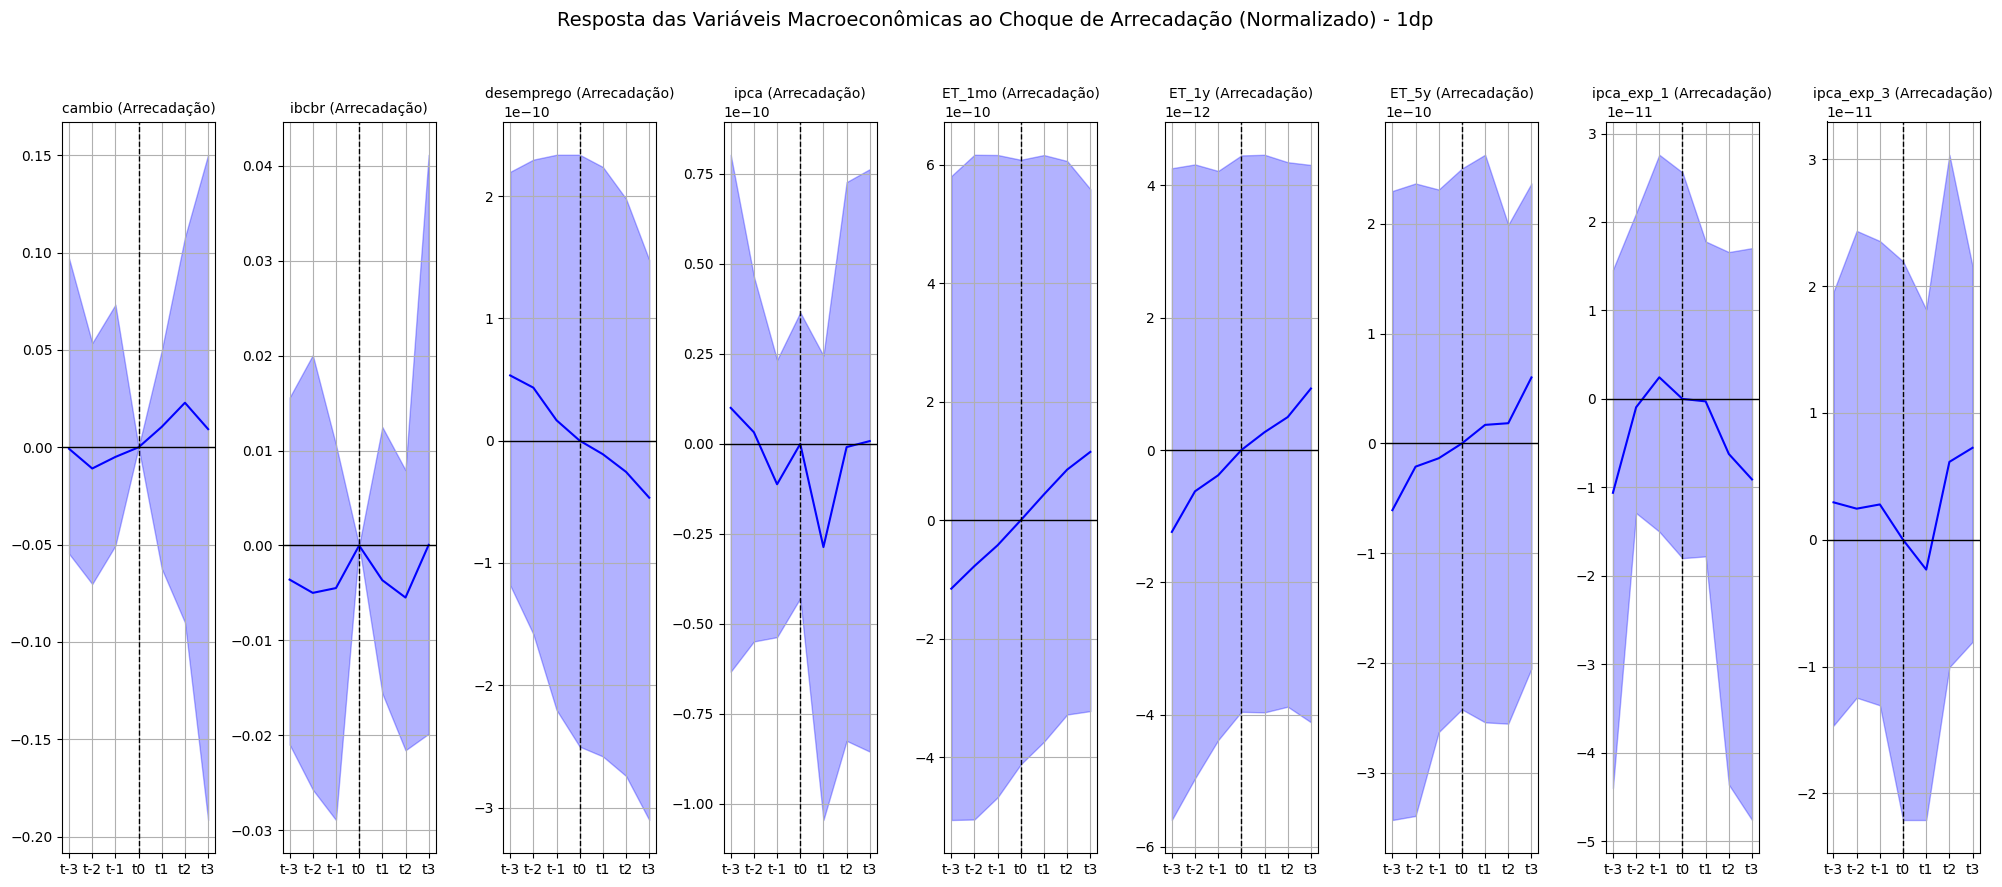

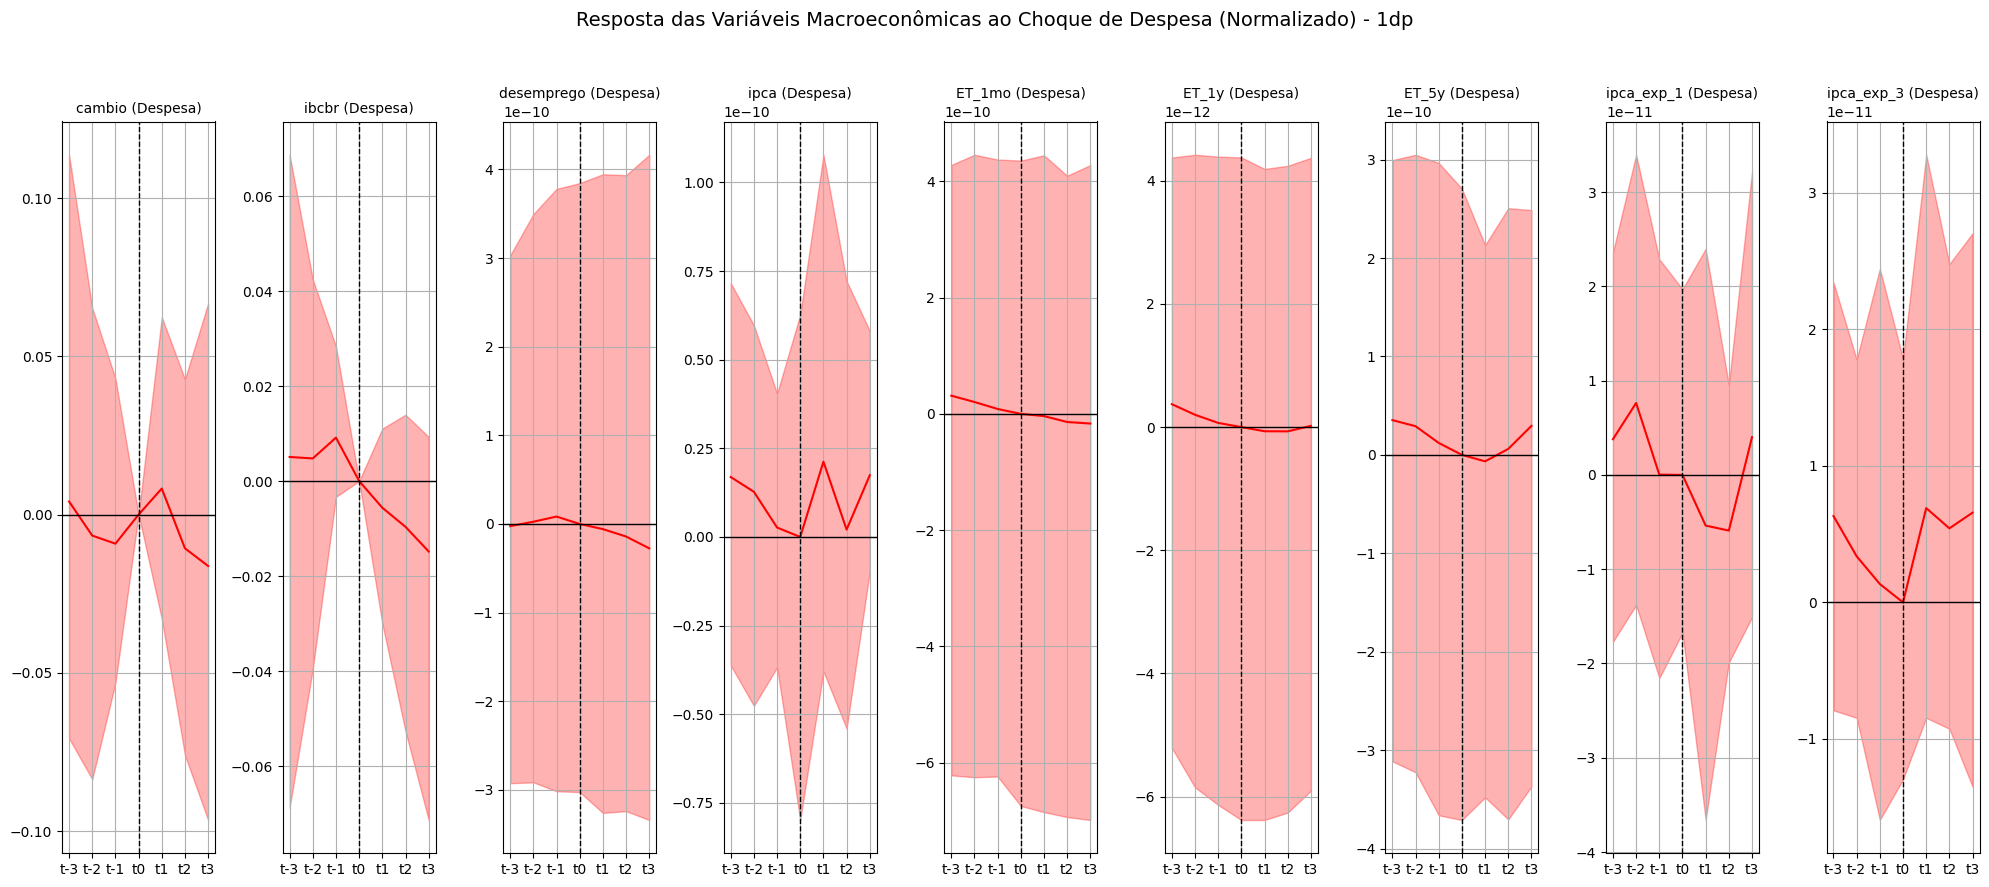

In [144]:
# Grid separado para Arrecadação (cor azul) com linha vertical em t0
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(20, 9), sharex=True)
tempos = [f't{i}' for i in range(-3, 4)]
t0_index = tempos.index('t0')

for idx, var in enumerate(variaveis_macro):
    ax = axes[idx]
    if var in ajustados_arrecad:
        r = ajustados_arrecad[var]
        ax.plot(tempos, r['media'], label='Média', color='blue')
        ax.fill_between(tempos, r['ic_min'], r['ic_max'], alpha=0.3, color='blue')
        ax.axvline(x='t0', color='black', linestyle='--', linewidth=1)
        ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
        ax.set_title(f'{var} (Arrecadação)', fontsize=10)
    else:
        ax.set_title(f'{var} (Arrecadação)\n[sem dados]', fontsize=10)
    ax.grid(True)

fig.suptitle('Resposta das Variáveis Macroeconômicas ao Choque de Arrecadação (Normalizado) - 1dp', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Grid separado para Despesa (cor vermelha) com linha vertical em t0
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(20, 9), sharex=True)

for idx, var in enumerate(variaveis_macro):
    ax = axes[idx]
    if var in ajustados_despesa:
        r = ajustados_despesa[var]
        ax.plot(tempos, r['media'], label='Média', color='red')
        ax.fill_between(tempos, r['ic_min'], r['ic_max'], alpha=0.3, color='red')
        ax.axvline(x='t0', color='black', linestyle='--', linewidth=1)
        ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
        ax.set_title(f'{var} (Despesa)', fontsize=10)
    else:
        ax.set_title(f'{var} (Despesa)\n[sem dados]', fontsize=10)
    ax.grid(True)

fig.suptitle('Resposta das Variáveis Macroeconômicas ao Choque de Despesa (Normalizado) - 1dp', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

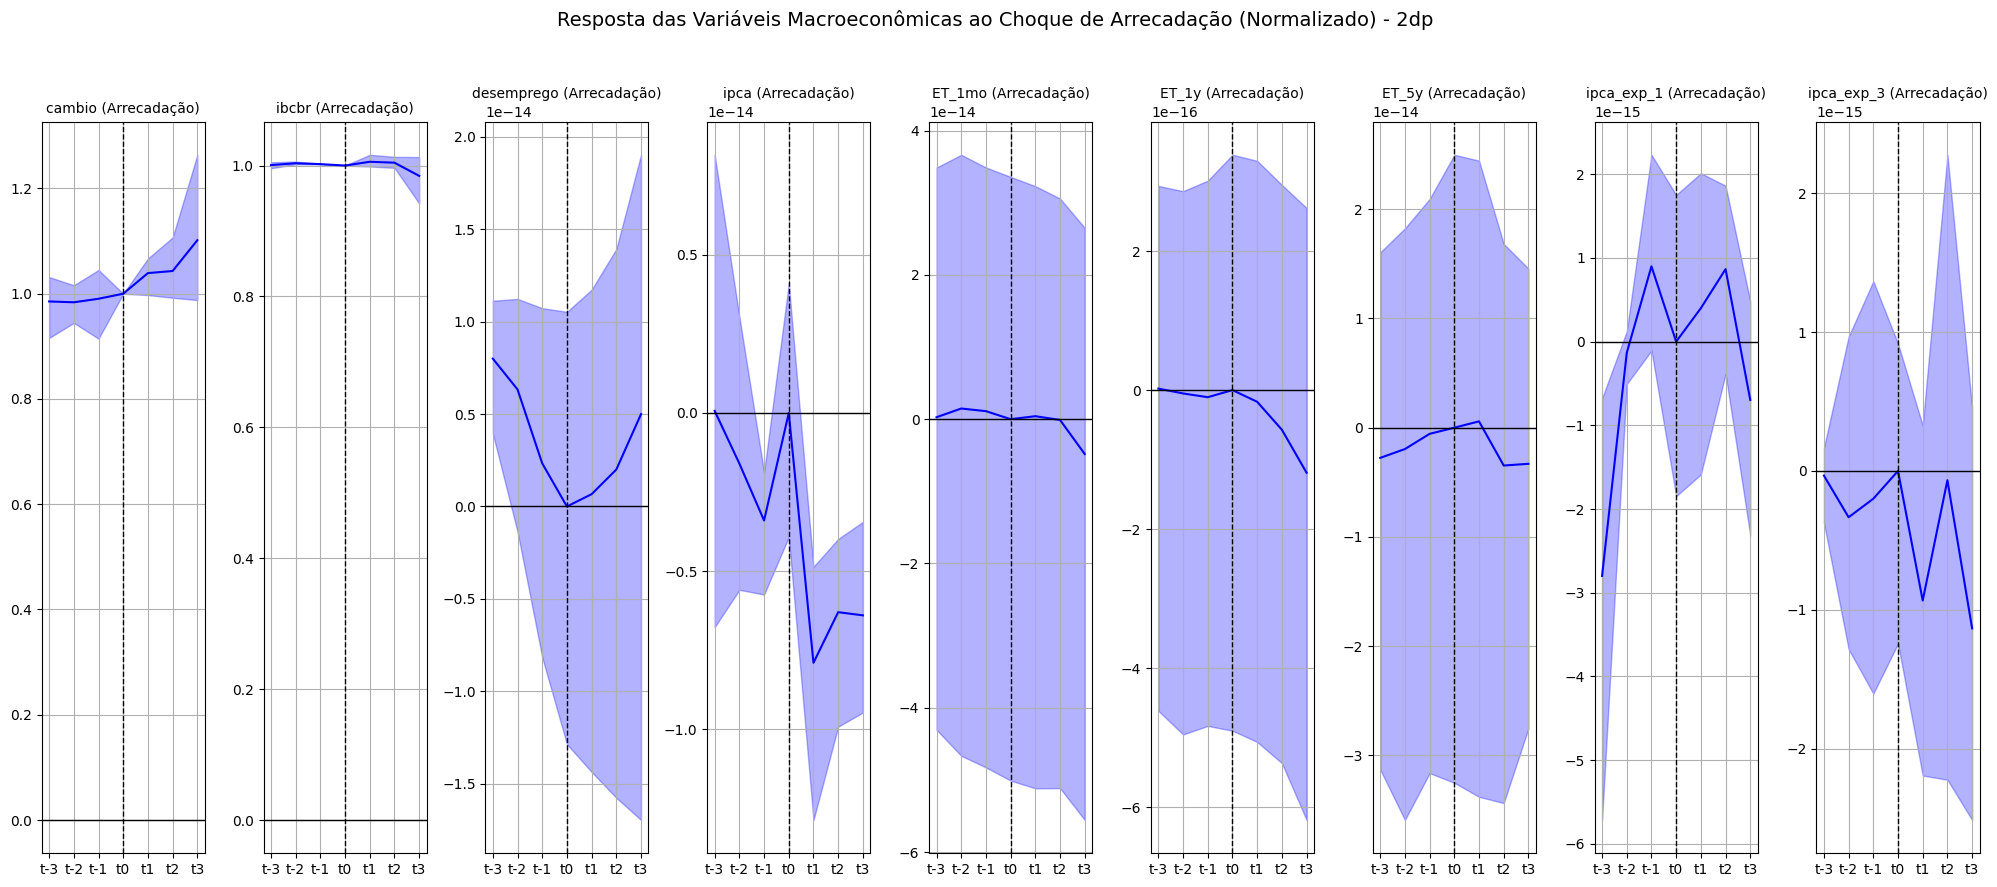

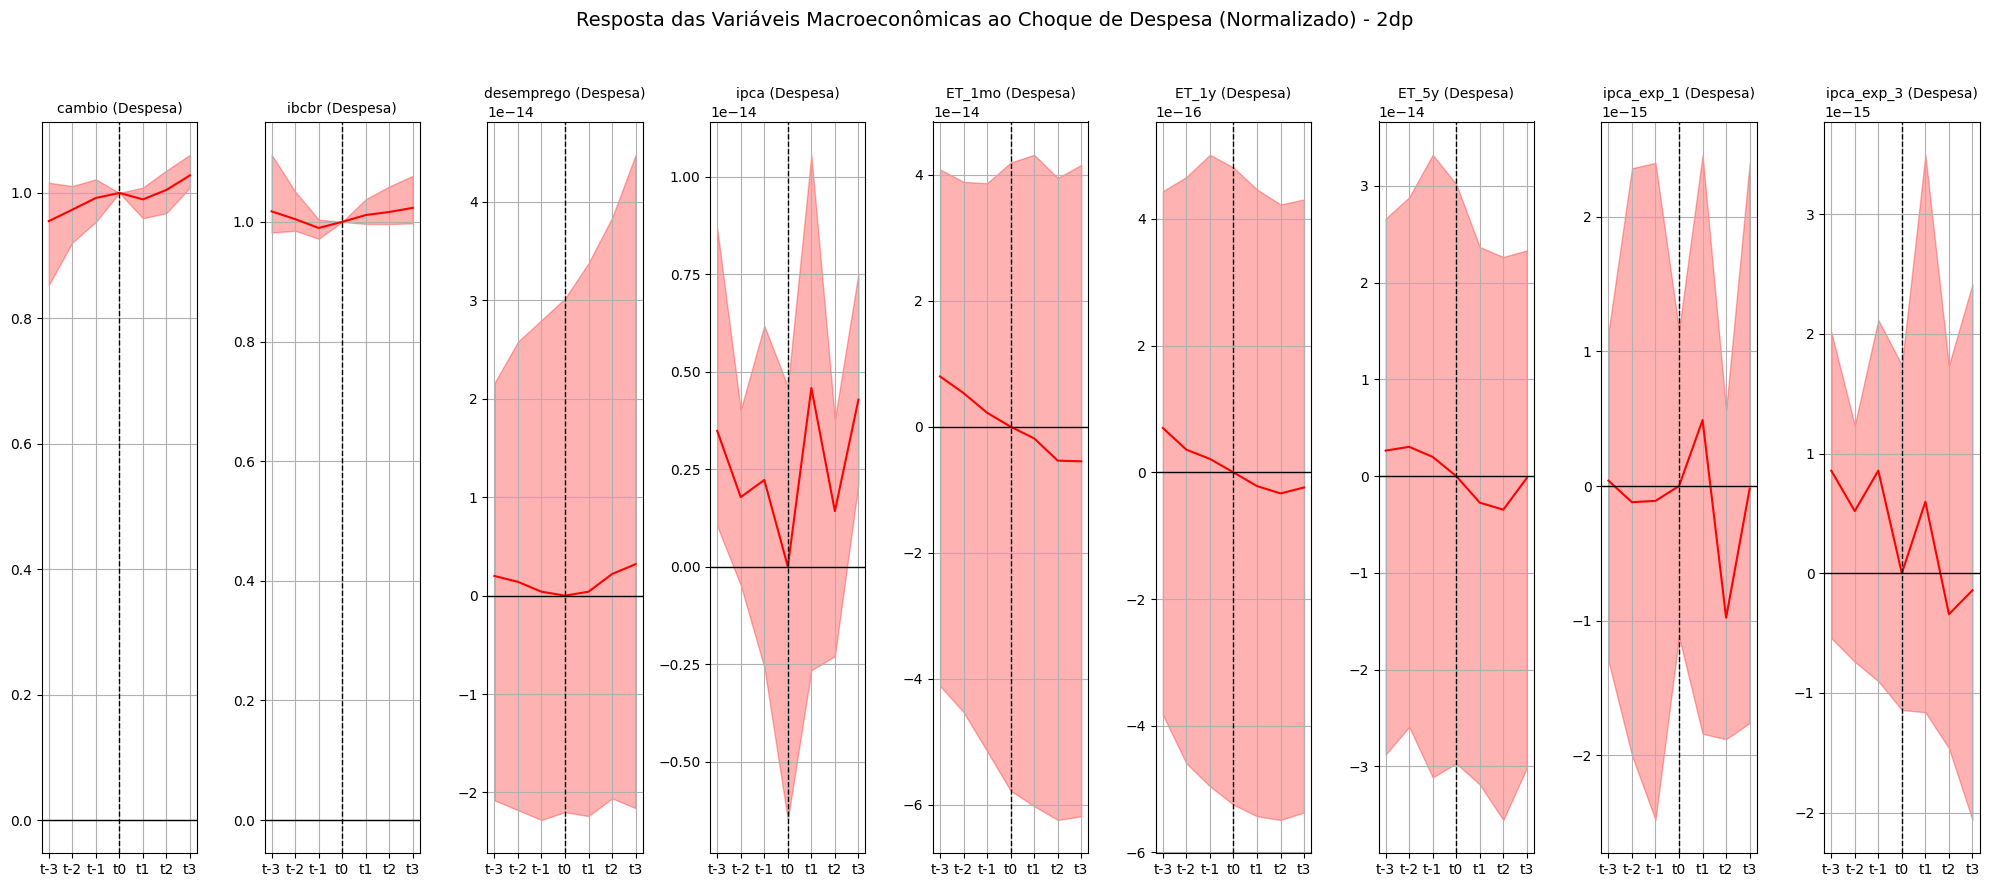

In [153]:
# Grid separado para Arrecadação (cor azul) com linha vertical em t0
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(20, 9), sharex=True)
tempos = [f't{i}' for i in range(-3, 4)]
t0_index = tempos.index('t0')

for idx, var in enumerate(variaveis_macro):
    ax = axes[idx]
    if var in ajustados_arrecad:
        r = ajustados_arrecad[var]
        ax.plot(tempos, r['media'], label='Média', color='blue')
        ax.fill_between(tempos, r['ic_min'], r['ic_max'], alpha=0.3, color='blue')
        ax.axvline(x='t0', color='black', linestyle='--', linewidth=1)
        ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
        ax.set_title(f'{var} (Arrecadação)', fontsize=10)
    else:
        ax.set_title(f'{var} (Arrecadação)\n[sem dados]', fontsize=10)
    ax.grid(True)

fig.suptitle('Resposta das Variáveis Macroeconômicas ao Choque de Arrecadação (Normalizado) - 2dp', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Grid separado para Despesa (cor vermelha) com linha vertical em t0
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(20, 9), sharex=True)

for idx, var in enumerate(variaveis_macro):
    ax = axes[idx]
    if var in ajustados_despesa:
        r = ajustados_despesa[var]
        ax.plot(tempos, r['media'], label='Média', color='red')
        ax.fill_between(tempos, r['ic_min'], r['ic_max'], alpha=0.3, color='red')
        ax.axvline(x='t0', color='black', linestyle='--', linewidth=1)
        ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
        ax.set_title(f'{var} (Despesa)', fontsize=10)
    else:
        ax.set_title(f'{var} (Despesa)\n[sem dados]', fontsize=10)
    ax.grid(True)

fig.suptitle('Resposta das Variáveis Macroeconômicas ao Choque de Despesa (Normalizado) - 2dp', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [72]:
resultados_despesa

{'cambio':         media    ic_min    ic_max
 t-3  4.864417  3.683325  5.570565
 t-2  4.919192  3.685105  5.633060
 t-1  4.928817  3.628035  5.449050
 t0   4.874392  3.762480  5.319545
 t1   4.837025  3.676550  5.473415
 t2   4.926558  3.836915  5.595710
 t3   4.964000  3.883100  5.711465,
 'ibcbr':           media     ic_min      ic_max
 t-3   98.569798  89.071112  103.859427
 t-2   98.605664  88.949814  104.855272
 t-1   98.219197  86.749744  104.976053
 t0    99.077603  89.233663  105.075484
 t1    99.588650  91.924230  105.512964
 t2    99.962693  93.789054  105.924067
 t3   100.469157  94.644543  106.204667,
 'desemprego':          media  ic_min  ic_max
 t-3  10.500000   7.600  13.555
 t-2  10.550000   7.610  14.020
 t-1  10.608333   7.510  14.305
 t0   10.525000   7.500  14.370
 t1   10.466667   7.265  14.470
 t2   10.383333   7.285  14.460
 t3   10.250000   7.185  14.690,
 'ipca':         media  ic_min  ic_max
 t-3  0.452500 -0.0790  0.9995
 t-2  0.410833 -0.1930  0.8805
 t-1  0

Questões:
1. verificar se a normalização está correta;
2. avaliar possíveis novas variáveis macro;
3. recalcular supresa fiscal - lembrar que temos a variavel de resultado primário. só não temos resultado nominal para toda a serie. apenas a partir de 21.